<a href="https://colab.research.google.com/github/kundanmishra/MachineLearning/blob/master/NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [6]:
# Importing required libraries
# conda install -c conda-forge scikit-plot
# conda install -c conda-forge wordcloud
import json
import tensorflow as tf
import requests
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt;

# Get the dataset

In [7]:
# Get the dataset
pd.set_option('max_colwidth', 100)
sarcasm = pd.read_json("./Sarcasm_Headlines_Dataset_v2.json", lines=True)
sarcasm.head()


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546


In [8]:
sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [9]:
sarcasm.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Some basic EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


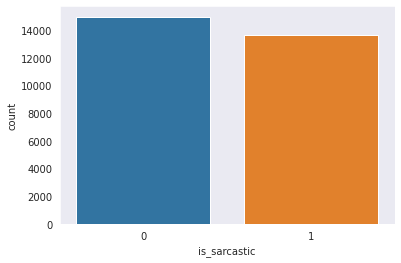

In [10]:
sns.set_style("dark")
sns.countplot(sarcasm.is_sarcastic)

In [11]:
from wordcloud import WordCloud,STOPWORDS

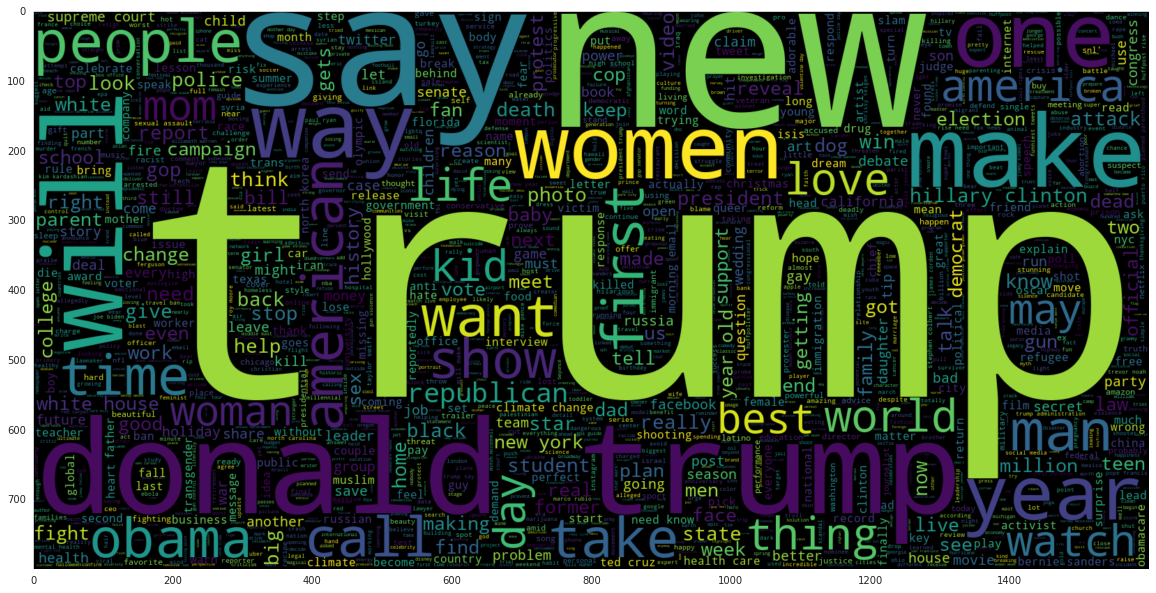

In [12]:
# Text that is Not Sarcastic
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sarcasm[sarcasm.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

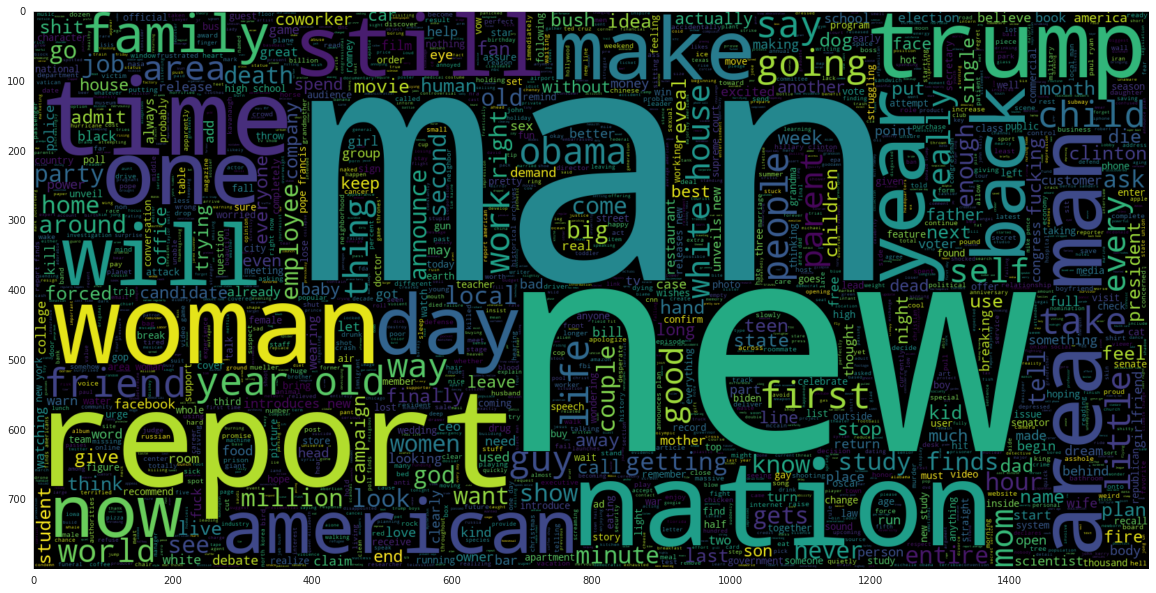

In [13]:
# Text that is Sarcastic
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sarcasm[sarcasm.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

# Removing punctuation

In [14]:
import string

def no_punctuation(text):
    no_punc = "".join([i for i in text if i not in string.punctuation])
    return no_punc

In [15]:
sarcasm['headline'] = sarcasm['headline'].apply(lambda x : no_punctuation(x))
sarcasm['headline'].head(10)

0                             thirtysomething scientists unveil doomsday clock of hair loss
1             dem rep totally nails why congress is falling short on gender racial equality
2                                          eat your veggies 9 deliciously different recipes
3                                      inclement weather prevents liar from getting to work
4                               mother comes pretty close to using word streaming correctly
5                                                                      my white inheritance
6                                                5 ways to file your taxes with less stress
7    richard bransons globalwarming donation nearly as much as cost of failed balloon trips
8                 shadow government getting too large to meet in marriott conference room b
9                                                        lots of parents know this scenario
Name: headline, dtype: object

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [17]:
sarcasm['headline'] = sarcasm['headline'].apply(lambda x : tokenizer.tokenize(x.lower()))
sarcasm['headline'].head(10)

0                                 [thirtysomething, scientists, unveil, doomsday, clock, of, hair, loss]
1            [dem, rep, totally, nails, why, congress, is, falling, short, on, gender, racial, equality]
2                                               [eat, your, veggies, 9, deliciously, different, recipes]
3                                          [inclement, weather, prevents, liar, from, getting, to, work]
4                                  [mother, comes, pretty, close, to, using, word, streaming, correctly]
5                                                                               [my, white, inheritance]
6                                                   [5, ways, to, file, your, taxes, with, less, stress]
7    [richard, bransons, globalwarming, donation, nearly, as, much, as, cost, of, failed, balloon, tr...
8                 [shadow, government, getting, too, large, to, meet, in, marriott, conference, room, b]
9                                                      

# remove_stopwords

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    text=[word for word in text if word not in stopwords.words('english')]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
sarcasm['headline'] = sarcasm['headline'].apply(lambda x : remove_stopwords(x))
sarcasm['headline'].head(10)

0                          [thirtysomething, scientists, unveil, doomsday, clock, hair, loss]
1              [dem, rep, totally, nails, congress, falling, short, gender, racial, equality]
2                                          [eat, veggies, 9, deliciously, different, recipes]
3                                         [inclement, weather, prevents, liar, getting, work]
4                           [mother, comes, pretty, close, using, word, streaming, correctly]
5                                                                        [white, inheritance]
6                                                        [5, ways, file, taxes, less, stress]
7    [richard, bransons, globalwarming, donation, nearly, much, cost, failed, balloon, trips]
8                   [shadow, government, getting, large, meet, marriott, conference, room, b]
9                                                             [lots, parents, know, scenario]
Name: headline, dtype: object

# WordNetLemmatizer

In [20]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmalize(text):
    lem_lext = " ".join([lemmatizer.lemmatize(word) for word in text])
    return lem_lext

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
sarcasm['headline'] = sarcasm['headline'].apply(lambda x : lemmalize(x))
sarcasm['headline'].head(10)

0                       thirtysomething scientist unveil doomsday clock hair loss
1              dem rep totally nail congress falling short gender racial equality
2                                       eat veggie 9 deliciously different recipe
3                                    inclement weather prevents liar getting work
4                         mother come pretty close using word streaming correctly
5                                                               white inheritance
6                                                        5 way file tax le stress
7    richard bransons globalwarming donation nearly much cost failed balloon trip
8                 shadow government getting large meet marriott conference room b
9                                                        lot parent know scenario
Name: headline, dtype: object

In [22]:
sarcastic = sarcasm['headline'].loc[sarcasm['is_sarcastic'] == 1]
acclaim = sarcasm['headline'].loc[sarcasm['is_sarcastic'] == 0]

In [23]:
sarcastic.reset_index(inplace = True, drop = True)
acclaim.reset_index(inplace = True, drop = True)

In [24]:
sarcastic.head(),acclaim.head()

(0                       thirtysomething scientist unveil doomsday clock hair loss
 1                                    inclement weather prevents liar getting work
 2                         mother come pretty close using word streaming correctly
 3    richard bransons globalwarming donation nearly much cost failed balloon trip
 4                 shadow government getting large meet marriott conference room b
 Name: headline, dtype: object,
 0    dem rep totally nail congress falling short gender racial equality
 1                             eat veggie 9 deliciously different recipe
 2                                                     white inheritance
 3                                              5 way file tax le stress
 4                                              lot parent know scenario
 Name: headline, dtype: object)

# Create a Bag of Words

In [25]:
# Create two objects X and y. X will be the 'headline' column of sarcasm dataframe and y will 
# be the 'is_sarcastic' column of yelp. create a CountVectorizer object and split the data into training 
# and testing sets. Train a MultinomialNB model for classifying the headlines and Display the confusion Matrix 

In [26]:
count_vec = CountVectorizer()
bow = count_vec.fit_transform(sarcasm['headline'])
bow = np.array(bow.todense())

In [27]:
X = bow
y = sarcasm['is_sarcastic']

# Split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

# Fit the model

In [ ]:
# Fit the model
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance

In [ ]:
# Evaluate model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

# confusion matrix

In [ ]:
# Constructing the confusion matrix.
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# Where did it go wrong? - Observing the prediction of the model. 

In [ ]:
#Where did it go wrong?
results = pd.DataFrame(data={'predicted': y_pred, 'actual': y_test})
predictions = results.join(sarcasm)

In [ ]:
def is_correct(predicted, actual):
    if predicted == actual:
        return True
    else:
        return False

predictions['correct'] = predictions.apply(lambda x: is_correct(x.predicted, x.actual), axis=1)
predictions = predictions[['headline','predicted','actual','correct']]

In [ ]:
predictions[predictions['correct']==False].sample(10)

# HMM POS tagging on the first 4 rows of ‘headline’

In [ ]:
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load("en_core_web_sm")



In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

In [ ]:
for i in range(4):
     print(sarcasm['headline'][i])